# IN3050/IN4050 Mandatory Assignment 3: Unsupervised Learning

**Name:**

**Username:**

### Rules

Before you begin the exercise, review the rules at this website: https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html , in particular the paragraph on cooperation. This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers with others. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo" https://www.uio.no/english/about/regulations/studies/studies-examinations/routines-cheating.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, April 22, 2022, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

### Goals of the exercise
This exercise has three parts. The first part is focused on Principal Component Analysis (PCA). You will go through some basic theory, and implent PCA from scratch to do compression and visualization of data.

The second part focuses on clustering using K-means. You will use `scikit-learn` to run K-means clustering, and use PCA to visualize the results.

The last part ties supervised and unsupervised learning together in an effort to evaluate the output of K-means using a logistic regression for multi-class classification approach.

The master students will also have to do one extra part about tuning PCA to balance compression with information lost.


### Tools
You may freely use code from the weekly exercises and the published solutions. In the first part about PCA you may **NOT** use ML libraries like `scikit-learn`. In the K-means part and beyond we encurage the use of `scikit-learn` to iterate quickly on the problems.

### Beware
This is a new assignment. There might occur typos or ambiguities. If anything is unclear, do not hesitate to ask. Also, if you think some assumptions are missing, make your
own and explain them!

## Principal Component Analysis (PCA)
In this section, you will work with the PCA algorithm in order to understand its definition and explore its uses.

### Principle of Maximum Variance: what is PCA supposed to do?
First of all, let us recall the principle/assumption of PCA:

1. What is the variance?
3. What is the covariance?
3. How do we compute the covariance matrix?
2. What is the meaning of the principle of maximum variance?
4. Why do we need this principle?
5. Does the principle always apply?

**Answer:** 

1. Variance is in formal statistical terms describing how much of a dispersion or spreading there are between data points relative to the mean value of the data set. In mathematical notation it is denoted by $$V(X) = E(X^2) - (E(X))^2$$ where $X$ is a random variable and $E(X)$ is its corresponding expected value.

2. Covariance is in many ways similar to variance, but where the main difference lies in that covariance is the joint variability between two random variables. Thus is correlation a great consequence of covariance. Covariance is mathematically denoted as
$$ Cov(X, Y) = E(XY) - E(X)E(Y) $$

3. By definition the covariance matrix is a square, symmetric matrix whom consists of the covariance relationships between two respective pair of elements in a random vector $$\mathbf{X} = [X_1, X_2, \ldots, X_n]^T.$$
As noted above the covariance of two arbitrary elements from $\mathbf{X}$ would yield $$ Cov(X_i, Y_j) = E(X_i X_j) - E(X_i)E(X_j) $$ and hence could we generalize this into saying that
$$Cov(\mathbf{X}) = E(\mathbf{X} \mathbf{X}^T) − E(\mathbf{X})E(\mathbf{X}^T)$$ 
which is simply
$$
Cov(\mathbf{X}) = \begin{pmatrix}
& V(X_1) & Cov(X_1, X_2) & \cdots & Cov(X_1, X_n) \\[5pt]
& Cov(X_2, X_1) & V(X_2) & \cdots & Cov(X_2, X_n) \\[5pt]
& \vdots & \vdots & \ddots & \vdots \\[5pt]
& Cov(X_n, X_1) & Cov(X_n, X_2) & \cdots & V(X_n)
\end{pmatrix}.
$$
Where we observe that the variance of each element is given along the main diagonal. Important to note is that this is an exact representation of the covariance matrix when the variables are continuous. In many cases the variables may be discrete such as in batch or sample analysis. Thus would the general expression of the covariance matrix look like 

$$ \Sigma_{i, j} = \frac{1}{N\mathbf{X}^T \mathbf{X}} $$

Where $N$ denotes the number of samples and $\mathbf{X}$ the data matrix.

4. The principal of maximum variance is in short a way of searching through a data set with two or more "components" to see if there are some of the components whom account for most of the variability within the data set. By doing so one could then analyze which component or components represent the most uniqueness in regards to representation of the data. 

In a more formal way and in context with the PCA it could be defined as trying to find the orthogonal projection of data into a lower dimensional linear space (idealistically) such that the projected data has maximal variance. 

5. By analyzing how much of the variance each component accounts for, one could more easily depict how much information that component gives about the whole data set. Thus by removing several dimensions of data and concentratring on the component with maximal variance the representation of the data set suddenly becomes a lot more manageable since one is working with a more or less linear relationship. 

6. No it does not. This is due to the fact that the data set might contain a lot of components who either have very high variances or quite similar. If this is the case then doing a linear analysis of two and two components would only result in an understanding of how those respective components are related to each other and not necessarily to the whole data set.


## Implementation: how is PCA implemented?
Here we implement the basic steps of PCA and we assemble them.

### Importing libraries
We start importing the *numpy* library for performing matrix computations, the *pyplot* library for plotting data, and the *syntheticdata* module to import synthetic data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import syntheticdata

### Centering the Data
Implement a function with the following signature to center the data as explained in *Marsland*.

In [3]:
def center_data(A):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    #
    # OUTPUT:
    # X    [NxM] numpy centered data matrix (N samples, M features)
    mean = np.mean(A, axis=0)
    X = A - mean
    return X

Test your function checking the following assertion on *testcase*:

In [4]:
testcase = np.array([[3.,11.,4.3],[4.,5.,4.3],[5.,17.,4.5],[4,13.,4.4]])
answer = np.array([[-1.,-0.5,-0.075],[0.,-6.5,-0.075],[1.,5.5,0.125],[0.,1.5,0.025]])
np.testing.assert_array_almost_equal(center_data(testcase), answer)

### Computing Covariance Matrix
Implement a function with the following signature to compute the covariance matrix as explained in *Marsland*.

In [5]:
def compute_covariance_matrix(A):
    # INPUT:
    # A    [NxM] centered numpy data matrix (N samples, M features)
    #
    # OUTPUT:
    # C    [MxM] numpy covariance matrix (M features, M features)
    #
    # Do not apply centering here. We assume that A is centered before this function is called.
    
    C = np.cov(A.T)
    
    return C

Test your function checking the following assertion on *testcase*:

In [6]:
testcase = center_data(np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5],[28.,14.,7]]))
answer = np.array([[580.,290.,145.],[290.,145.,72.5],[145.,72.5,36.25]])

to_test = compute_covariance_matrix(testcase)

answer = answer/answer[0, 0]
to_test = to_test/to_test[0, 0]

np.testing.assert_array_almost_equal(to_test, answer)

### Computing eigenvalues and eigenvectors
Use the linear algebra package of `numpy` and its function `np.linalg.eig()` to compute eigenvalues and eigenvectors. Notice that we take the real part of the eigenvectors and eigenvalues. The covriance matrix *should* be a symmetric matrix, but the actual implementation in `compute_covariance_matrix()` can lead to small round off errors that lead to tiny imaginary additions to the eigenvalues and eigenvectors. These are purely numerical artifacts that we can safely remove.

**Note:** If you decide to NOT use `np.linalg.eig()` you must make sure that the eigenvalues you compute are of unit lenght!

In [7]:
def compute_eigenvalue_eigenvectors(A):
    # INPUT:
    # A    [DxD] numpy matrix
    #
    # OUTPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors
    
    eigval, eigvec = np.linalg.eig(A)
    
    
    # Numerical roundoff can lead to (tiny) imaginary parts. We correct that here.
    eigval = eigval.real
    eigvec = eigvec.real
    
    return eigval, eigvec

Test your function checking the following assertion on *testcase*:

In [8]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([2.,5.,3.])
answer2 = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

### Sorting eigenvalues and eigenvectors
Implement a function with the following signature to sort eigenvalues and eigenvectors as explained in *Marsland*.

Remember that eigenvalue *eigval[i]* corresponds to eigenvector *eigvec[:,i]*.

In [9]:
def sort_eigenvalue_eigenvectors(eigval, eigvec):
    # INPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors
    #
    # OUTPUT:
    # sorted_eigval    [D] numpy vector of eigenvalues
    # sorted_eigvec    [DxD] numpy array of eigenvectors

    indices = np.argsort(eigval)
    indices = indices[::-1]
    sorted_eigval = eigval[indices]
    sorted_eigvec = eigvec[:,indices]
    
    return sorted_eigval, sorted_eigvec


Test your function checking the following assertion on *testcase*:

In [10]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([5.,3.,2.])
answer2 = np.array([[0.,0.,1.],[1.,0.,0.],[0.,1.,0.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
x,y = sort_eigenvalue_eigenvectors(x,y)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

### PCA Algorithm
Implement a function with the following signature to compute PCA as explained in *Marsland* using the functions implemented above.

In [11]:
def pca(A,m):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    #
    # OUTPUT:
    # pca_eigvec    [Mxm] numpy matrix containing the eigenvectors (M dimensions, m eigenvectors)
    # P             [Nxm] numpy PCA data matrix (N samples, m features)
    
    X = center_data(A)
    C = compute_covariance_matrix(X)
    eigval, eigvec = compute_eigenvalue_eigenvectors(C)
    _, pca_eigvec = sort_eigenvalue_eigenvectors(eigval, eigvec)
    
    if m > 0: # If m is more than 0, 
        pca_eigvec = pca_eigvec[:,:m]
    
    P = np.dot(pca_eigvec.T, X.T)
    
    return pca_eigvec, P.T


Test your function checking the following assertion on *testcase*:

In [12]:
testcase = np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5]])
x,y = pca(testcase,2)

import pickle
answer1_file = open('PCAanswer1.pkl','rb'); answer2_file = open('PCAanswer2.pkl','rb')
answer1 = pickle.load(answer1_file); answer2 = pickle.load(answer2_file)


test_arr_x = np.sum(np.abs(np.abs(x) - np.abs(answer1)), axis=0)
np.testing.assert_array_almost_equal(test_arr_x, np.zeros(2))


test_arr_y = np.sum(np.abs(np.abs(y) - np.abs(answer2)))
np.testing.assert_almost_equal(test_arr_y, 0)

## Understanding: how does PCA work?
We now use the PCA algorithm you implemented on a toy data set in order to understand its inner workings.

### Loading the data
The module *syntheticdata* provides a small synthetic dataset of dimension [100x2] (100 samples, 2 features).

In [13]:
X = syntheticdata.get_synthetic_data1()

### Visualizing the data
Visualize the synthetic data using the function *scatter()* from the *matplotlib* library.

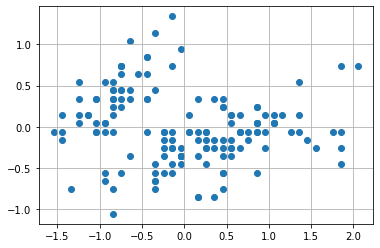

In [47]:
plt.scatter(X[:,0],X[:,1])
plt.grid()

### Visualize the centered data
Notice that the data visualized above is not centered on the origin (0,0). Use the function defined above to center the data, and the replot it.

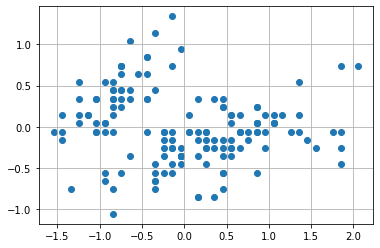

In [48]:
X = center_data(X)
plt.scatter(X[:, 0], X[:, 1])
plt.grid()

### Visualize the first eigenvector
Visualize the vector defined by the first eigenvector.
To do this you need:
- Use the *PCA()* function to recover the eigenvectors
- Plot the centered data as done above 
- The first eigenvector is a 2D vector (x0,y0). This defines a vector with origin in (0,0) and head in (x0,y0). Use the function *plot()* from matplotlib to plot a line over the first eigenvector.

[ 0.36138659 -0.65658877]


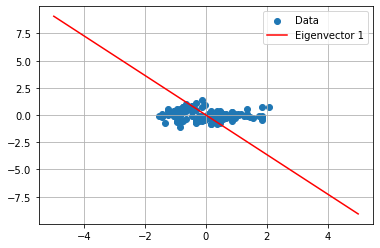

In [56]:
pca_eigvec, _ = pca(X, 2)
eigenvec_1 = pca_eigvec[0]
print(eigenvec_1)

x = np.linspace(-5, 5, 1000)
y = eigenvec_1[1]/eigenvec_1[0] * x
plt.scatter(X[:, 0], X[0:, 1], label='Data')
plt.plot(x, y, color='r', label='Eigenvector 1')
plt.grid()
plt.legend()


### Visualize the PCA projection
Finally, use the *PCA()* algorithm to project on a single dimension and visualize the result using again the *scatter()* function.

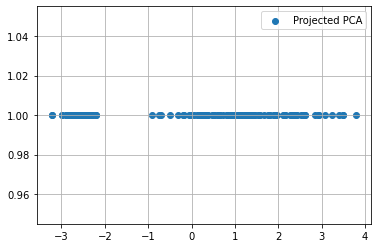

In [58]:
_, P = pca(X, X.shape[1])
plt.scatter(P[:, 0], np.ones(P[:, 0].shape), label='Projected PCA')
plt.legend()
plt.grid()

## Evaluation: when are the results of PCA sensible?
So far we have used PCA on synthetic data. Let us now imagine we are using PCA as a pre-processing step before a classification task. This is a common setup with high-dimensional data. We explore when the use of PCA is sensible.

### Loading the first set of labels
The function *get_synthetic_data_with_labels1()* from the module *syntethicdata* provides a first labeled dataset.

In [67]:
X,y = syntheticdata.get_synthetic_data_with_labels1()

### Running PCA
Process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

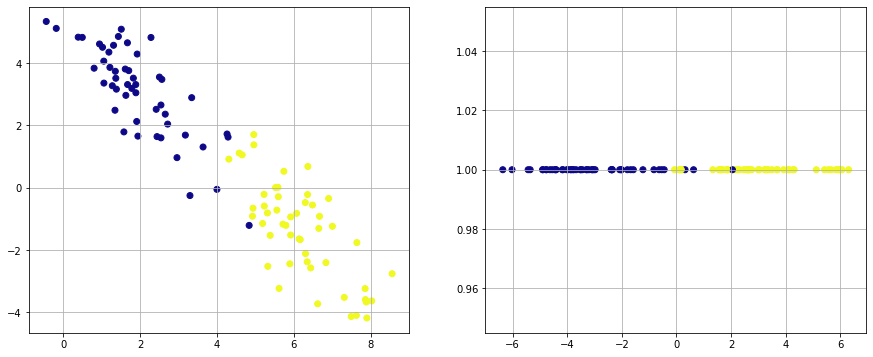

In [81]:
fig = plt.subplots(12, figsize=(15, 6))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='plasma')
plt.grid()
#Data points are colour split to distinguish labeling in plot
plt.subplot(122)
_, P = pca(X, X.shape[1])
plt.scatter(P[:, 0], np.ones(P.shape[0]), c=y[:, 0], cmap='plasma')
plt.grid()


**Comment:**

From the non-projected plot we can see that the data are well separated and in some sense are almost linearly separable. This consequently makes the projected plot well separated as well since we are projecting the data in relation to a line which represents the data structure in the most reasonable way.

### Loading the second set of labels
The function *get_synthetic_data_with_labels2()* from the module *syntethicdata* provides a second labeled dataset.

In [96]:
X,y = syntheticdata.get_synthetic_data_with_labels2()

### Running PCA
As before, process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

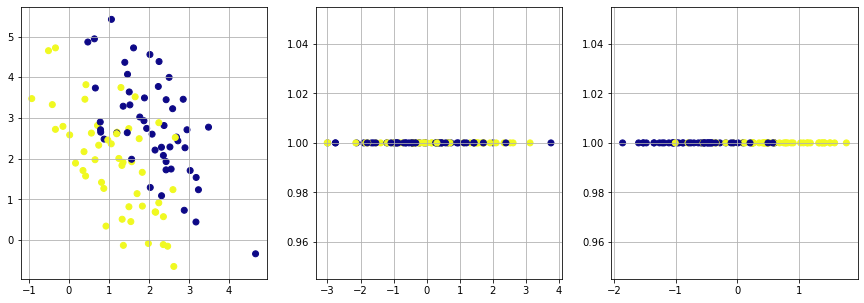

In [97]:
fig = plt.subplots(13, figsize=(15, 5))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='plasma')
plt.grid()

_, P = pca(X, X.shape[1])
plt.subplot(132)
plt.scatter(P[:, 0], np.ones(P.shape[0]), c=y[:, 0], cmap='plasma')
plt.grid()
plt.subplot(133)

plt.scatter(P[:, 1], np.ones(P.shape[0]), c=y[:, 0], cmap='plasma')
plt.grid()


**Comment:**

In regrads to this plot we see a less clear distinction in the separation of labels. This in turn results to a more chaotic plot where there is not a reasonable way to seperate the data in a reasonable way. Though to be noted there is a clearer distinction between the two projected plots which might imply that some of the labels might account for more variety than others.

How would the result change if you were to consider the second eigenvector? Or if you were to consider both eigenvectors?

**Answer**:

If we are to look at plot three, which is to represent the second eigenvector there is a lot more separation between the projected data, but hence a lot less variation. And with less varation there could occur larger error margins. 

By considering both eigenvectors one would get an idea of how the two distinctive eigenspaces are behaving and developing. Since an eigenspace consists of eigenvectors whom have the same eigenvalues one could analyse each such eigenvector and see how different linear combinations might behave within the eigenspace.

## Case study 1: PCA for visualization
We now consider the *iris* dataset, a simple collection of data (N=150) describing iris flowers with four (M=4) features. The features are: Sepal Length, Sepal Width, Petal Length and Petal Width. Each sample has a label, identifying each flower as one of 3 possible types of iris: Setosa, Versicolour, and Virginica.

Visualizing a 4-dimensional dataset is impossible; therefore we will use PCA to project our data in 2 dimensions and visualize it.

### Loading the data
The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].

In [132]:
X,y = syntheticdata.get_iris_data()

### Visualizing the data by selecting features
Try to visualize the data (using label information) by randomly selecting two out of the four features of the data. You may try different pairs of features.

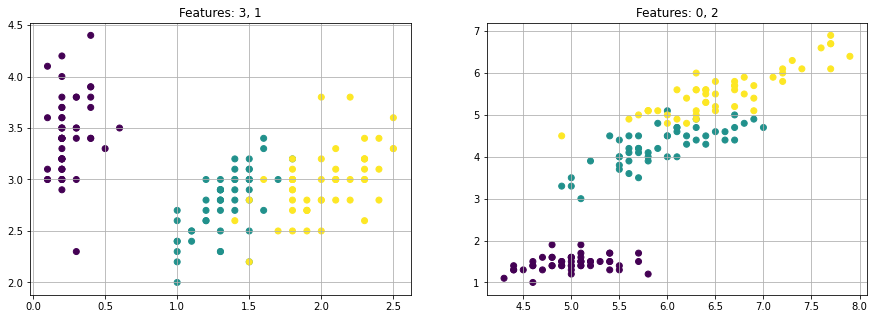

In [133]:
import random

feature_One = random.randint(0, 3)
feature_Two = random.randint(0, 3)
while feature_One == feature_Two:
    feature_Two = random.randint(0, 3)

fig = plt.subplots(12, figsize=(15, 5))

plt.subplot(121)
plt.scatter(X[:, feature_One], X[:, feature_Two], c=y)
plt.title(f'Features: {feature_One}, {feature_Two}')
plt.grid()

feature_list= [i for i in range(0, 4)]

feature_list.remove(feature_One)
feature_list.remove(feature_Two)

plt.subplot(122)
plt.scatter(X[:, feature_list[0]], X[:, feature_list[1]], c=y)
plt.title(f'Features: {feature_list[0]}, {feature_list[1]}')
plt.grid()


### Visualizing the data by PCA
Process the data using PCA and visualize it (using label information). Compare with the previous visualization and comment on the results.

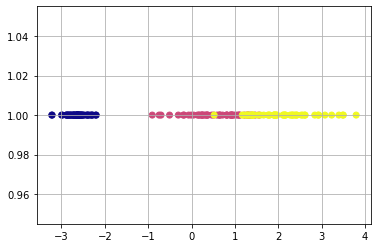

In [135]:
_, P = pca(X, X.shape[1])
plt.scatter(P[:, 0], np.ones(P.shape[0]), c=y, cmap='plasma')
plt.grid()

**Comment:** 

As viewed from both plots above there are rather clear separations in the data points which makes it is easier to categorize the different labels. Thus is the dispersion between the different features relative to the mean quite similar and reasonably small. Though to be noted there is in the latter plot an even greater separation between one of the features than the others (i.e the dark blue points).

## Case study 2: PCA for compression
We now consider the *faces in the wild (lfw)* dataset, a collection of pictures (N=1280) of people. Each pixel in the image is a feature (M=2914).

### Loading the data
The function *get_lfw_data()* from the module *syntethicdata* returns the *lfw* dataset. It returns a data matrix of dimension [1280x2914] and a label vector of dimension [1280]. It also returns two parameters, $h$ and $w$, reporting the height and the width of the images (these parameters are necessary to plot the data samples as images). Beware, it might take some time to download the data. Be patient :) 

In [136]:
X,y,h,w = syntheticdata.get_lfw_data()

### Inspecting the data
Choose one datapoint to visualize (first coordinate of the matrix $X$) and use the function [imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html) to plot and inspect some of the pictures.

Notice that *imshow* receives as a first argument an image to be plot; the image must be provided as a rectangular matrix, therefore we reshape a sample from the matrix $X$ to have height $h$ and width $w$. The parameter *cmap* specifies the color coding; in our case we will visualize the image in black-and-white with different gradations of grey.

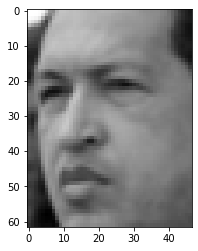

In [146]:
plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.show()

### Implementing a compression-decompression function
Implement a function that first uses PCA to project samples in low-dimensions, and the reconstruct the original image.

*Hint:* Most of the code is the same as the previous PCA() function you implemented. You may want to refer to *Marsland* to check out how reconstruction is performed.

In [139]:
def encode_decode_pca(A,m):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    #
    # OUTPUT:
    # Ahat [NxM] numpy PCA reconstructed data matrix (N samples, M features)
    eig_vecs, P = pca(A, m)

    A_hat = np.dot(P, eig_vecs.T)
    
    return A_hat


### Compressing and decompressing the data
Use the implemented function to encode and decode the data by projecting on a lower dimensional space of dimension 200 (m=200).

In [140]:
X_hat = encode_decode_pca(X, 200)

### Inspecting the reconstructed data
Use the function *imshow* to plot and compare original and reconstructed pictures. Comment on the results.

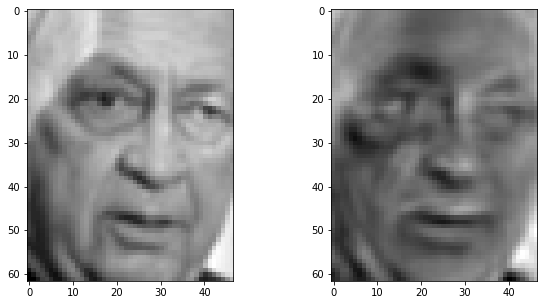

In [145]:
fig = plt.subplots(12, figsize=(10, 5))
plt.subplot(121)
plt.imshow(X[50, :].reshape((h, w)), cmap=plt.cm.gray)
plt.subplot(122)
plt.imshow(X_hat[50, :].reshape((h, w)), cmap=plt.cm.gray)

plt.show()

**Comment:** 

The reconstructed image is as one can observe neither as clear or detailed as the inital one. But there are clear markers which still pinpoint the main features of the inital picture. This being that it is a photo of a male human with the usual biological attributes such as (nose, lips, eyes etc...) and we even might recognise who this person is.

### Evaluating different compressions
Use the previous setup to generate compressed images using different values of low dimensions in the PCA algorithm (e.g.: 100, 200, 500, 1000). Plot and comment on the results.

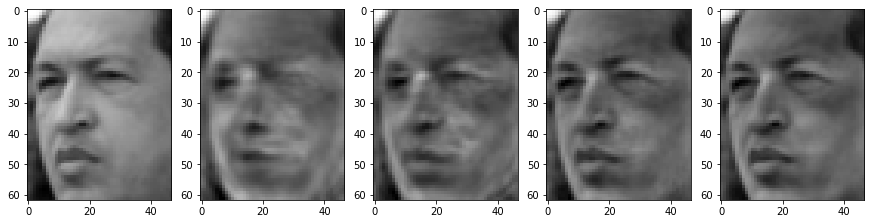

In [149]:
fig = plt.subplots(15, figsize=(20, 5))

plt.subplot(151)
plt.imshow(X[0, :].reshape((h, w)), cmap=plt.cm.gray)


X_hat = encode_decode_pca(X, 100)

plt.subplot(152)
plt.imshow(X_hat[0, :].reshape((h, w)), cmap=plt.cm.gray)


X_hat = encode_decode_pca(X, 200)

plt.subplot(153)
plt.imshow(X_hat[0, :].reshape((h, w)), cmap=plt.cm.gray)


X_hat = encode_decode_pca(X, 500)
plt.subplot(154)
plt.imshow(X_hat[0, :].reshape((h, w)), cmap=plt.cm.gray)


X_hat = encode_decode_pca(X, 1000)

plt.subplot(155)
plt.imshow(X_hat[0, :].reshape((h, w)), cmap=plt.cm.gray)

plt.show()

**Comment:** 

With increased dimension in the PCA one can see that the reconstructed image becomes more and more detailed. Though to be noted there seems to be an upper limit to how detailed the picture can get, due to the fact that the clarity and the level of detail from 500 to a 1000 is less than for a 100 to 500. Thus is it reasonable to find an upper bound to how well the picture could get reconstructed.

## Master Students: PCA Tuning
If we use PCA for compression or decompression, it may be not trivial to decide how many dimensions to keep. In this section we review a principled way to decide how many dimensions to keep.

The number of dimensions to keep is the only *hyper-parameter* of PCA. A method designed to decide how many dimensions/eigenvectors is the *proportion of variance*:
$$ \textrm{POV}=\frac{\sum_{i=1}^{m}{\lambda_{i}}}{\sum_{j=1}^{M}{\lambda_{j}}}, $$
where $\lambda$ are eigenvalues, $M$ is the dimensionality of the original data, and $m$ is the chosen lower dimensionality. 

Using the $POV$ formula we may select a number $M$ of dimensions/eigenvalues so that the proportion of variance is, for instance, equal to 95%.

Implement a new PCA for encoding and decoding that receives in input not the number of dimensions for projection, but the amount of proportion of variance to be preserved.

In [31]:
def encode_decode_pca_with_pov(A,p):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # p    float number between 0 and 1 denoting the POV to be preserved
    #
    # OUTPUT:
    # Ahat [NxM] numpy PCA reconstructed data matrix (N samples, M features)
    # m    integer reporting the number of dimensions selected

    m = None
    Ahat = None
    
    return Ahat,m

Import the *lfw* dataset using the *get_lfw_data()* in *syntheticdata*. Use the implemented function to encode and decode the data by projecting on a lower dimensional space such that POV=0.9. Use the function *imshow* to plot and compare original and reconstructed pictures. Comment on the results.

In [35]:
#X,y,h,w = syntheticdata.get_lfw_data()

In [33]:
# Xhat,m = encode_decode_pca_with_pov(X,None)

In [36]:
# plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)
# plt.figure()
# plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)

**Comment:** Enter your comment here.

# K-Means Clustering (Bachelor and master students)
In this section you will use the *k-means clustering* algorithm to perform unsupervised clustering. Then you will perform a qualitative assesment of the results.

### Importing scikit-learn library
We start importing the module *cluster.KMeans* from the standard machine learning library *scikit-learn*.

In [150]:
from sklearn.cluster import KMeans

### Loading the data
We will use once again the *iris* data set. The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].

In [151]:
X,y = syntheticdata.get_iris_data()

### Projecting the data using PCA
To allow for visualization, we project our data in two dimensions as we did previously. This step is not necessary, and we may want to try to use *k-means* later without the PCA pre-processing. However, we use PCA, as this will allow for an easy visualization.

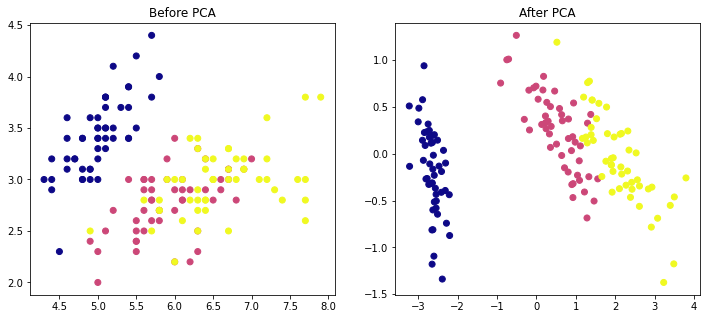

In [169]:
fig = plt.subplots(12, figsize=(12, 5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
plt.title("Before PCA")

_, P = pca(X, 2)
plt.subplot(122)
plt.scatter(P[:, 0], P[:, 1], c=y, cmap='plasma')
plt.title("After PCA")

plt.show()

### Running k-means
We will now consider the *iris* data set as an unlabeled set, and perform clustering to this unlabeled set. We can compare the results of the clustering to the lableled calsses.

Use the class *KMeans* to fit and predict the output of the *k-means* algorithm on the projected data. Run the algorithm using the following values of $k=\{2,3,4,5\}$. 

In [167]:
km = KMeans(2)
y_hat_2 = km.fit_predict(P)

km = KMeans(3)
y_hat_3 = km.fit_predict(P)

km = KMeans(4)
y_hat_4 = km.fit_predict(P)

km = KMeans(5)
y_hat_5 = km.fit_predict(P)

### Qualitative assessment
Plot the results of running the k-means algorithm, compare with the true labels, and comment.

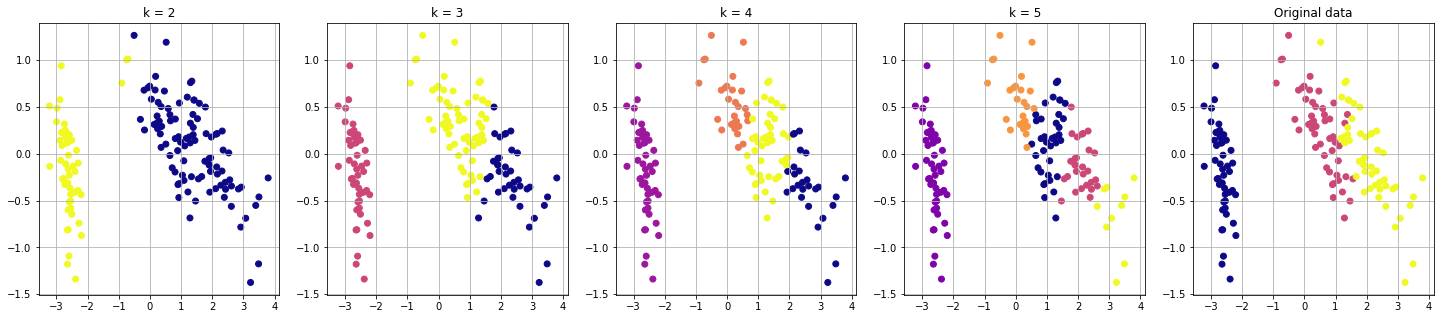

In [176]:
fig = plt.subplots(15, figsize=(25, 5))

plt.subplot(151)
plt.scatter(P[:, 0], P[:, 1], c=y_hat_2, cmap='plasma')
plt.title('k = 2')
plt.grid()

plt.subplot(152)
plt.scatter(P[:, 0], P[:, 1], c=y_hat_3, cmap='plasma')
plt.title('k = 3')
plt.grid()

plt.subplot(153)
plt.scatter(P[:, 0], P[:, 1], c=y_hat_4, cmap='plasma')
plt.title('k = 4')
plt.grid()

plt.subplot(154)
plt.scatter(P[:, 0], P[:, 1], c=y_hat_5, cmap='plasma')
plt.title('k = 5')
plt.grid()

plt.subplot(155)
plt.scatter(P[:, 0], P[:, 1], c=y, cmap='plasma')
plt.title('Original data')
plt.grid()


plt.show()


**Comment:**

An obvious observation is that with increased k we obtain more labels from the data set. This is very useful when working with data that might have labels whom are either quite hidden or have relatively similar behaviour to those of the other labels. In this way one could categorize a larger amount of data. 

Even so, are there also clear observations that it is hard to determine for which k it is most reasonable to model the data set into correct categories. Since each plot yields a well seperated division of labels there seems to either be ambiguities or indeterminations in where the labels are separated. Thus is it more reasonable to do a local variance analysis to check if there are any stand out labels whom account for a bigger variance in the data than others. 

# Quantitative Assessment of K-Means (Bachelor and master students)

We used k-means for clustering and we assessed the results qualitatively by visualizing them. However, we often want to be able to measure in a quantitative way how good the clustering was. To do this, we will use a classification task to evaluate numerically the goodness of the representation learned via k-means.

Reload the *iris* dataset. Import a standard `LogisticRegression` classifier from the module `sklearn.linear_model`. Use the k-means representations learned previously (`yhat2,...,yhat5`) and the true label to train the classifier. Evaluate your model on the training data (we do not have a test set, so this procedure will assess the model fit instead of generalization) using the `accuracy_score()` function from the *sklearn.metrics* module. Plot a graph showing how the accuracy score varies when changing the value of k. Comment on the results.

- Train a Logistic regression model using the first two dimensions of the PCA of the iris data set as input, and the true classes as targets.
- Report the model fit/accuracy on the training set.
- For each value of K:
  - One-Hot-Encode the classes output by the K-means algorithm.
  - Train a Logistic regression model on the K-means classes as input vs the real classes as targets.
  - Calculate model fit/accuracy vs. value of K.
- Plot your results in a graph and comment on the K-means fit.

Training set Accuracy : 0.967


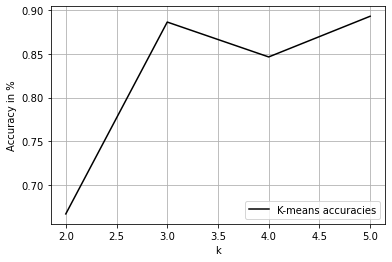

k:2 
 Accuracy: 0.667
k:3 
 Accuracy: 0.887
k:4 
 Accuracy: 0.847
k:5 
 Accuracy: 0.893


In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

yList = [y_hat_2,y_hat_3,y_hat_4,y_hat_5]
X,y = syntheticdata.get_iris_data()
_,P = pca(X, 2)
logReg = LogisticRegression().fit(P, y)

print(f"Training set Accuracy : {logReg.score(P, y):.3f}")

accuracy_list = []


for y_hat in yList:
    y_hat_Len = len(range(0, max(y_hat) + 1))
    one_encod_yhat = []

    for lableNum in y_hat:
        arr = [0]* y_hat_Len
        arr[lableNum-1] = 1 
        one_encod_yhat.append(arr) 
        
    logreg = LogisticRegression().fit(one_encod_yhat, y)
    pred = logreg.predict(one_encod_yhat)
    score = metrics.accuracy_score(y, pred)
    accuracy_list.append(score)
    
num_k = [i for i in range(2,6)]   
plt.plot(num_k, accuracy_list, color='black', label='K-means accuracies')
plt.grid()
plt.xlabel('k')
plt.ylabel('Accuracy in %')
plt.legend()
plt.show()

for acc, k in zip(accuracy_list, num_k):
    print(f'k:{k} \n Accuracy: {acc:.3f}')


**Comment:**

One can clearly see that with increased $k$ the accuracy seems to be increasing as well (though in this example with the exception of $k = 4$). For $k = 5$ the accuracy is at its closest to the training set accuracy which might imply that for some $k$ higher one might meet the same target.

As a thought it could be worth arguing that for any higher $k$ one could encounter situations where the accuracy might stagnate or drop depending on the relations between the labels in the data. If the variation between the labels are small and quite similar then for any larger $k$ the result would be quite similar. But there might also be situations where for higher $k$ one encounters more labels whom make up for a larger part of the variation and thus might the accuracy accordingly either drop drastically or idealistically rise to an optimal value. (This is just a thought, so do not quote me on this).


# Conclusions 

In this notebook we studied **unsupervised learning** considering two important and representative algorithms: **PCA** and **k-means**.

First, we implemented the PCA algorithm step by step; we then run the algorithm on synthetic data in order to see its working and evaluate when it may make sense to use it and when not. We then considered two typical uses of PCA: for **visualization** on the *iris* dataset, and for **compression-decompression** on the *lfw* dateset.

We then moved to consider the k-means algorithm. In this case we used the implementation provided by *scikit-learn* and we applied it to another prototypical unsupervised learning problem: **clustering**; we used *k-means* to process the *iris* dataset and we evaluated the results visually.

In the final part, we considered two additional questions that may arise when using the above algorithms. For PCA, we considered the problem of **selection of hyper-parameters**, that is, how we can select the hyper-parameter of ou algorithm in a reasonable fashion. For k-means, we considered the problem of the **quantitative evaluation** of our results, that is, how can we measure the performance or usefulness of our algorithms. 